In [ ]:
# !pip3 install 'transformers[torch]'

In [86]:
import json
import os
from googletrans import Translator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
%matplotlib inline


In [28]:
trans = Translator()
json_list = os.listdir('./결과물/json_results')
len(json_list)

4030

In [29]:
total_json = []
for filename in json_list:
    with open('./결과물/json_results/'+filename, 'r') as f:
        data = json.load(f)
        total_json.append(data)
total_json

[{'색상': ['보라색', '연보라색'],
  '행동': None,
  '개체명': 'T',
  '느낌, 분위기': ['단순함', '깔끔함'],
  'images': [{'url': 'https://datahunt.s3.ap-northeast-2.amazonaws.com/uploads/dataset_7228/origins/6STBghdr_%5B%EB%8D%B0%EC%BD%94%20%EC%8A%A4%ED%8B%B0%EC%BB%A4%5D%20%EC%B0%B0%EB%9E%91%EC%B0%B0%EB%9E%91%20%EC%95%8C%ED%8C%8C%EB%B2%B3_149.png'}],
  'relativePath': '',
  'name': '[데코 스티커] 찰랑찰랑 알파벳_149.png'},
 {'색상': ['초록색'],
  '행동': None,
  '개체명': '컵, 음료, 차',
  '느낌, 분위기': ['맛있는', '시원함', '깔끔함'],
  'images': [{'url': 'https://datahunt.s3.ap-northeast-2.amazonaws.com/uploads/dataset_7228/origins/P1wszFOy_BASIC%20%EC%8A%A4%ED%8B%B0%EC%BB%A4%20%EA%B7%B8%EB%A6%B0_42.png'}],
  'relativePath': '',
  'name': 'BASIC 스티커 그린_42.png'},
 {'색상': ['흰색', '파란색', '보라색', '분홍색'],
  '행동': None,
  '개체명': '별, 보석',
  '느낌, 분위기': ['화려함', '아름다움'],
  'images': [{'url': 'https://datahunt.s3.ap-northeast-2.amazonaws.com/uploads/dataset_7228/origins/D7L_r7R5_%5B%ED%96%89%EC%9A%B4%EC%9D%98%20%EB%A3%A8%EC%86%8C%5D%20%EC%A0%95%EB%A0%B9%EC%9D%

In [165]:
# english name, path dictionary, write as json file
namepath = {}
for whole in total_json:
    l = list(whole['개체명'].split(','))
    ans = []
    for x in l:
        if x[0] == ' ':
            x = x[1:]
        ans.append(enkordict[x].lower())
    namepath[whole['name']] = ans
namepath


 
# Writing to sample.json
with open("./namepath.json", "w", encoding='utf-8') as outfile:
    json.dump(namepath, outfile, ensure_ascii=False, indent=4)
    

In [66]:
total_json[9]['개체명']

'꽃'

In [ ]:
# 사진 띄우기, 옆에 결과 적어놓기, 원래 json파일에 있는 데이터도 적어놓기

In [30]:
object_list = []
for json_dict in total_json:
    object_list += list(json_dict['개체명'].split(','))
object_set = set(object_list)
object_set = list(object_set)

In [31]:
for i, x in enumerate(object_set):
    if x[0] == ' ':
        object_set[i] = x[1:]


In [32]:
enkordict = {}
for kor in object_set:
    enkordict[kor] = trans.translate(kor, dest='en').text
enkordict

{'7': '7',
 '카라멜': 'Caramel',
 '사탕': 'candy',
 '컵 받침': 'coasters',
 '컨테피': 'Contefi',
 '꽃잎': 'petal',
 '스마일': 'smile',
 '고양이': 'cat',
 '쿠키': 'cookie',
 '콜라': 'Cola',
 '앞치마': 'apron',
 '목표': 'target',
 '유리병': 'glass bottle',
 'we can do it': 'we can do it',
 '팬케이크': 'pancake',
 '영화 포스터': 'movie poster',
 '건물': 'building',
 '야자수': 'palm tree',
 '컨테티': 'Conteti',
 '갈대': 'Reed',
 '바나나': 'banana',
 '화요일': 'tuesday',
 '봉지': 'bag',
 '타원': 'Ellipse',
 '에어팟': 'AirPods',
 '버스': 'bus',
 '고양이 꼬리': 'cat tail',
 '19': '19',
 '쇼핑리스트': 'shopping list',
 '복숭아': 'peach',
 '신문지': 'newspaper',
 '모자': 'hat',
 '화살표': 'arrow',
 '압정': 'tack',
 '리스': 'lease',
 '계획표': 'schedule',
 '거미줄': 'Spider web',
 'love you': 'love you',
 '모래': 'sand',
 '수박': 'watermelon',
 'o': 'o',
 '요거트': 'yogurt',
 '머플러': 'Muffler',
 '일요일': 'sunday',
 '수건걸이': 'towel rack',
 '줄무늬': 'stripe',
 '체크리스트': 'check list',
 '창문': 'window',
 '카네이션': 'carnation',
 'posco': 'posco',
 '뒤집개': 'flipper',
 '빗자루': 'broomstick',
 '표정': 'expression',
 '바

In [127]:
labels = [i.lower() for i in enkordict.values()]
clip_labels = [f"an illust of a {label}" for label in labels]
clip_labels

['an illust of a 7',
 'an illust of a caramel',
 'an illust of a candy',
 'an illust of a coasters',
 'an illust of a contefi',
 'an illust of a petal',
 'an illust of a smile',
 'an illust of a cat',
 'an illust of a cookie',
 'an illust of a cola',
 'an illust of a apron',
 'an illust of a target',
 'an illust of a glass bottle',
 'an illust of a we can do it',
 'an illust of a pancake',
 'an illust of a movie poster',
 'an illust of a building',
 'an illust of a palm tree',
 'an illust of a conteti',
 'an illust of a reed',
 'an illust of a banana',
 'an illust of a tuesday',
 'an illust of a bag',
 'an illust of a ellipse',
 'an illust of a airpods',
 'an illust of a bus',
 'an illust of a cat tail',
 'an illust of a 19',
 'an illust of a shopping list',
 'an illust of a peach',
 'an illust of a newspaper',
 'an illust of a hat',
 'an illust of a arrow',
 'an illust of a tack',
 'an illust of a lease',
 'an illust of a schedule',
 'an illust of a spider web',
 'an illust of a love 

/var/folders/x4/8t59xhvx40l6fc13fqn7j1840000gn/T/ipykernel_64836/275906588.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 10))


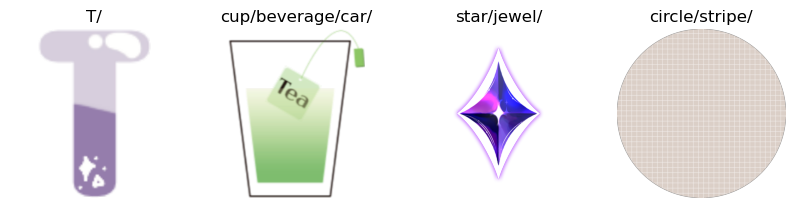

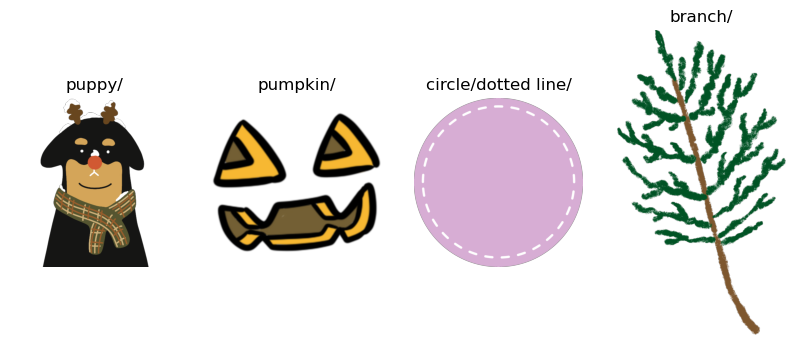

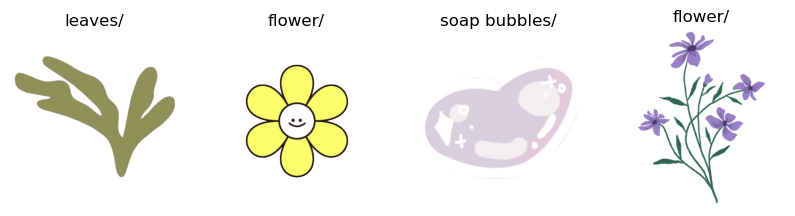

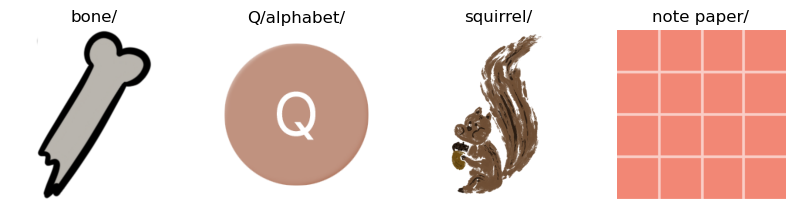

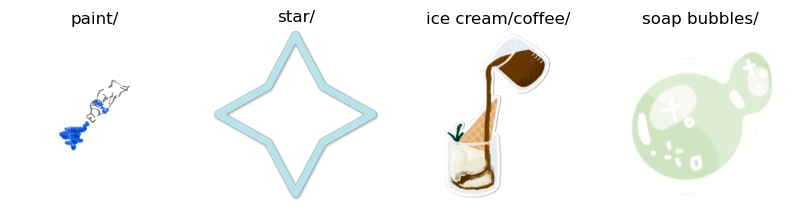

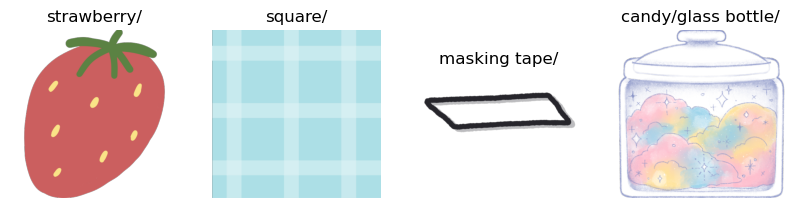

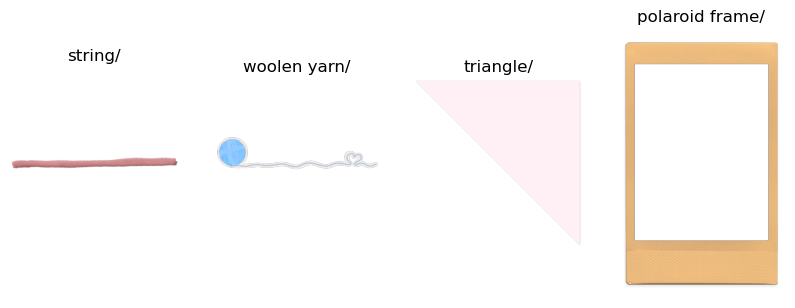

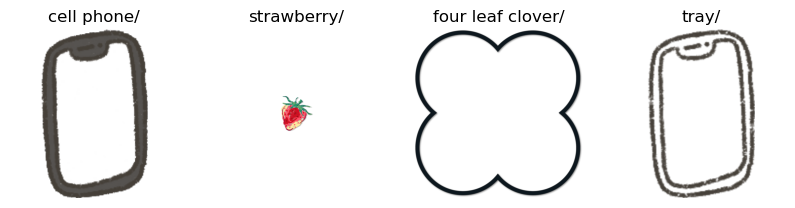

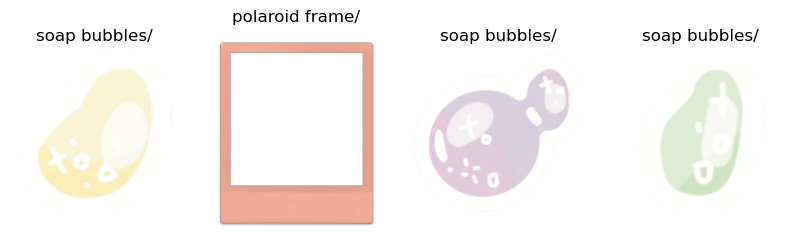

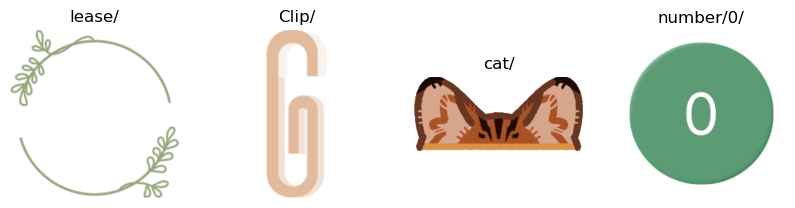

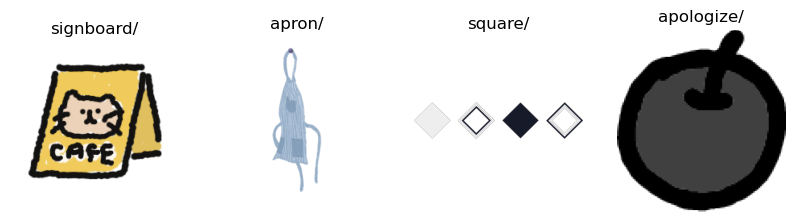

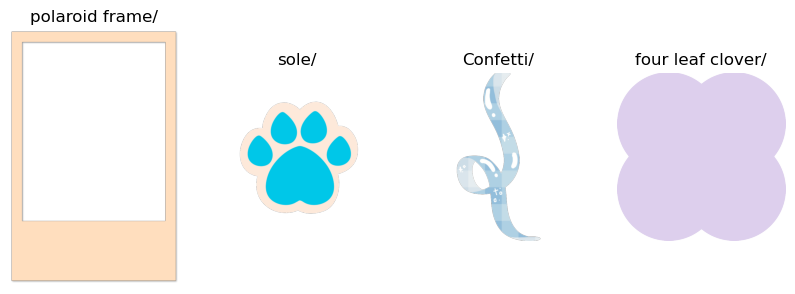

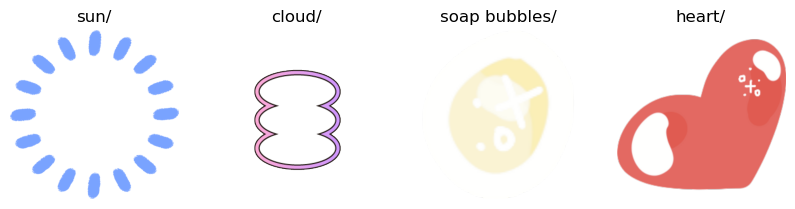

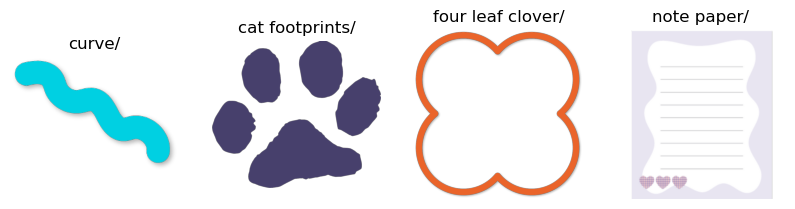

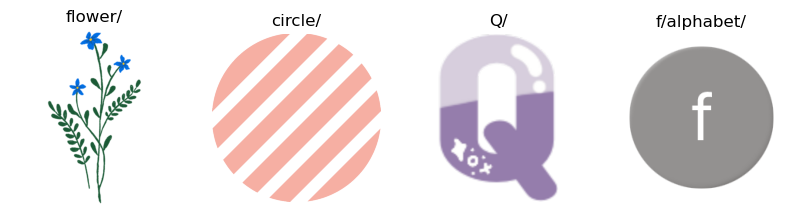

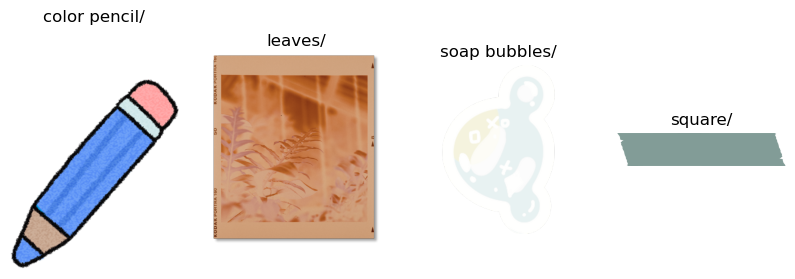

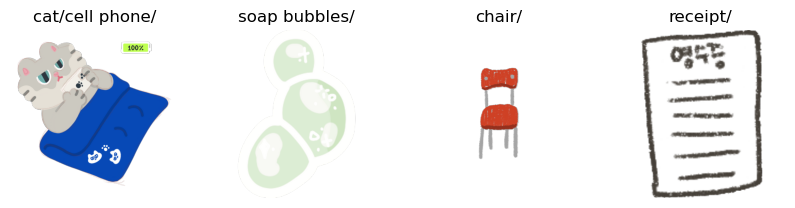

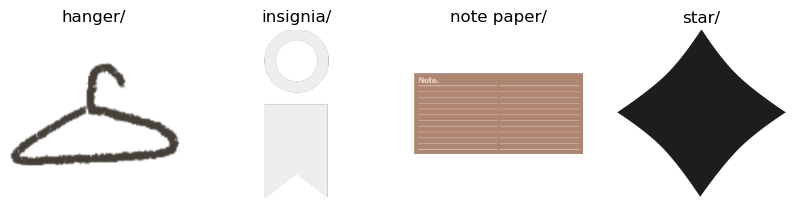

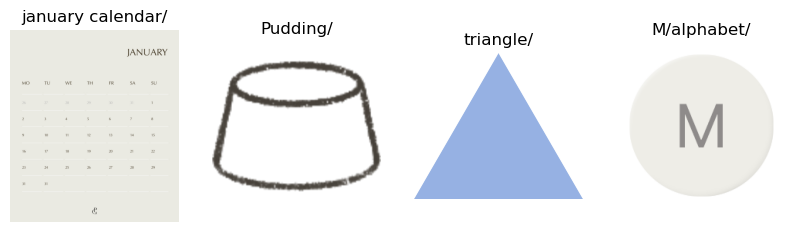

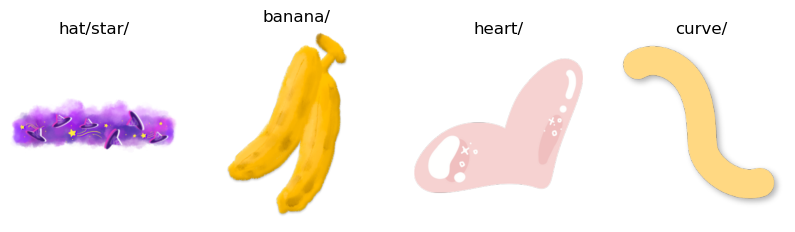

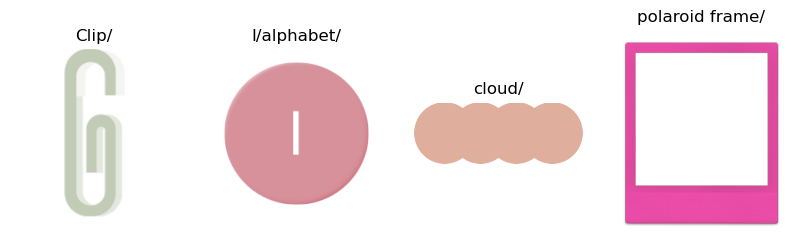

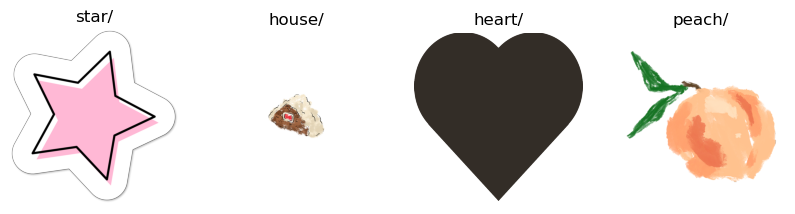

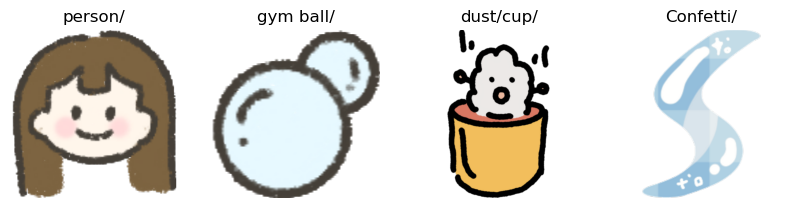

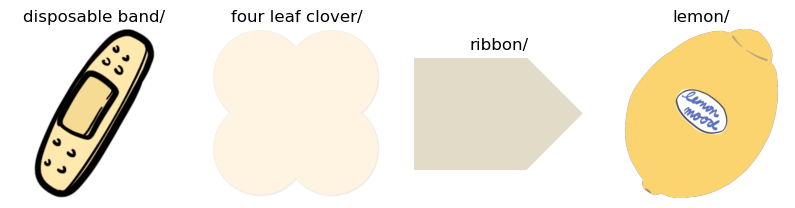

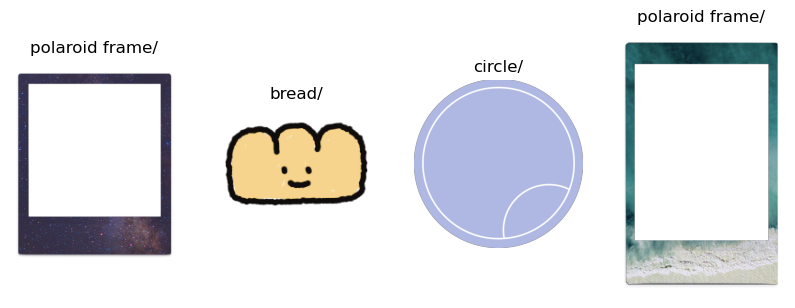

In [183]:
columns = 4
rows = 7
%matplotlib inline
# fig = plt.figure(figsize=(10, 10))
for i, label_dict in enumerate(total_json[:100]):
    if i % 4 == 0:
        fig = plt.figure(figsize=(10, 10))
    path = './결과물/masking_tape/'+label_dict['name']
    img = Image.open(path)
#     img = cv2.imread(path)
#     fig.add_subplot(rows, columns, i+1)
    fig.add_subplot(1, 4, i%4+1)
    eng_label = ''
    l = list(label_dict['개체명'].split(','))
    for x in l:
        if x[0] == ' ':
            x = x[1:]
        eng_label += enkordict[x] + '/'
    plt.title(eng_label)
    plt.axis('off')
    plt.imshow(img)
# plt.show()



In [104]:
# from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights


# Step 1: Initialize model with the best available weights
weights = ResNet50_QuantizedWeights.DEFAULT
model = resnet50(weights=weights, quantize=True)
model.eval()

# img = read_image(path)
for i, label_dict in enumerate(total_json[:10]):
    path = './결과물/masking_tape/'+label_dict['name']
    img = torch.tensor(cv2.imread(path))
    img = img.permute(2, 0, 1)


    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = preprocess(img).unsqueeze(0)

    # Step 4: Use the model and print the predicted category
    prediction = model(batch).squeeze(0).softmax(0)
    class_id = prediction.argmax().item()
    
    score = prediction[class_id].item()
    ans = ''
    ind = np.argpartition(prediction.detach().numpy(), -4)[-4:]
    for x in ind:
        ans += weights.meta["categories"][x] + ' '
    category_name = weights.meta["categories"][class_id]
    print(f"{category_name}: {100 * score:.1f}%")
    print(ans)

ImportError: cannot import name 'ResNet50_QuantizedWeights' from 'torchvision.models' (/Users/simchaeeun/anaconda3/envs/chaeeun/lib/python3.11/site-packages/torchvision/models/__init__.py)

In [214]:
import torch
from transformers import CLIPProcessor, CLIPModel
import json
# model_id = 'openai/clip-vit-base-patch32'
base_path32 = 'openai/clip-vit-base-patch32'
large_patch14 = "openai/clip-vit-large-patch14"
large_patch14336 = "openai/clip-vit-large-patch14-336"

model_id = large_patch14

In [215]:
# initialize processor, label_tokens, model, device, normalize label embeddings
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

label_tokens = processor(text=clip_labels,
                        padding=True,
                        images=None,
                        return_tensors='pt'
                        ).to(device)

label_emb = model.get_text_features(**label_tokens)
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

#normalize
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:

# load image, calculate similarity, retrieve top 3->5 items
# print with original labels

# with open('./namepath.json', 'r') as f:
#     namepath = json.load(f)

pred_list = []; label_list = []
for i, x in enumerate(namepath):
#     if i % 4 == 0:
#         fig = plt.figure(figsize=(10, 10))
    path = './결과물/masking_tape/' + x
    img = Image.open(path)
    image = processor(text=None,
                     images=img,
                     return_tensors='pt'
                     )['pixel_values'].to(device)
    img_emb = model.get_image_features(image)
    img_emb = img_emb.detach().cpu().numpy()
    scores = np.dot(img_emb, label_emb.T)
    pred = np.argsort(scores[0])[::-1][:5]
    top_5 = [labels[x] for x in pred]
#     fig.add_subplot(1, 4, i%4+1)
    pred_out = 'predicted:'+','.join(top_5)
    if 'card' in pred_out or 'cell phone screen' in pred_out:
        pred_out += ', polaroid frame'
#     label = 'label:' + ','.join(namepath[x])
    pred_list.append(pred_out)
#     label_list.append(label)
#     label_list.append(namepath[x])
#     print(label)
#     print(pred_out)
#     print()
#     print()
#     plt.title(label+'\n'+pred_out)
#     plt.axis('off')
#     plt.imshow(img)
    

In [213]:
# # base_patch32
# cor = 0
# total = len(label_list)

# for i, x in enumerate(namepath):
#     for item in namepath[x]:
#         if item in pred_list[i]:
#             cor += 1
#             break
# acc = cor/total*100
# print("base_patch32: ", acc)

base_patch32:  56.55086848635236


In [ ]:
# large-patch14
cor = 0
total = len(label_list)

for i, x in enumerate(namepath):
    for item in namepath[x]:
        if item in pred_list[i]:
            cor += 1
            break
acc = cor/total*100
print("large_patch14:", acc)

In [ ]:
# large-patch14-336
cor = 0
total = len(label_list)

for i, x in enumerate(namepath):
    for item in namepath[x]:
        if item in pred_list[i]:
            cor += 1
            break
acc = cor/total*100
print("large_patch14_336:", acc)